# 实验二 线性回归实验
本实验主要研究线性回归中的典型回归方法及其过拟合现象

## 实验目的
1. 了解线性回归的基本原理
2. 掌握Scikit-learn库的基本功能和操作

## 实验工具
1. Anaconda, Jupyter Notebook
2. numpy, pandas,sklearn, matplotlib

## 实验内容
### 1.系统库的导入

In [58]:
#不显示程序运行过程中的警告
import warnings
warnings.filterwarnings('ignore')

In [59]:
#导入实验所需的库
import numpy
import pandas
import sklearn
import seaborn
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

from IPython.display import Latex
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from scipy.interpolate import make_interp_spline

### 2. 简单线性回归演示 

In [60]:
#配置显示中文，否则乱码
mpl.rcParams['font.sans-serif'] = ['SimHei']
#读入数据
regression_data = pandas.read_csv(r'./Datasets/simple_regression_data.csv')

该数据集包含了不同供应商在不同时期的钢材体积与价格的数据

In [77]:
#查看数据集中前几个数据
regression_data.head(10)

,Volume,Price
0,4.690628,27.000389
1,4.235716,24.925126
2,4.626838,20.931068
3,6.166307,31.296321
4,3.433759,17.315909
5,5.945953,34.816306
6,4.632415,15.999182
7,3.959437,25.061199
8,3.923685,23.585337
9,5.605697,31.889041


画散点图表示数据分布情况

Text(0.5, 1.0, '价格-体积关系图')

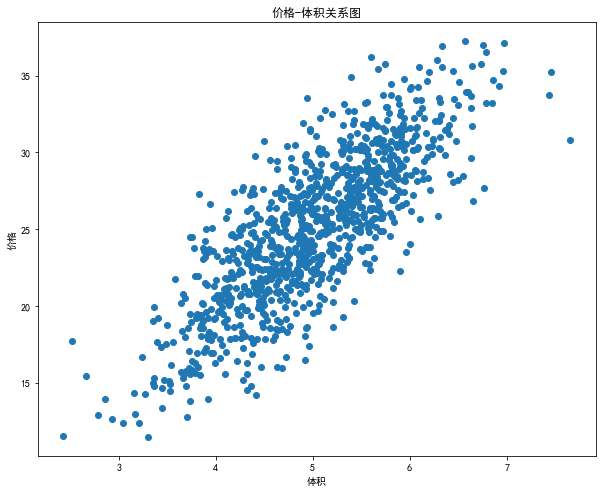

In [62]:
plt.scatter(regression_data['Volume'],regression_data['Price'])
plt.xlabel('体积')
plt.ylabel('价格')
plt.title('价格-体积关系图')

In [63]:
#将整个数据集分成训练集和测试集。
#训练集有80%的数据，并保留另外20%的数据作为测试集。
X_train, X_test, Y_train, Y_test = train_test_split(regression_data['Volume'], regression_data['Price'], test_size=0.20)
X_train

949    4.882189
320    5.333298
861    4.460188
35     4.856759
716    5.250649
         ...   
894    3.844684
914    6.175412
951    5.349846
627    5.333914
619    4.817030
Name: Volume, Length: 800, dtype: float64

In [64]:
#创建线性回归对象
simple_linear_regression = LinearRegression()

#用训练集训练线性回归模型
X_train = X_train.values
Y_train = Y_train.values
X_test = X_test.values
simple_linear_regression.fit(pandas.DataFrame(X_train), pandas.DataFrame(Y_train))

#用测试集预测模型输出
Y_pred= simple_linear_regression.predict(pandas.DataFrame(X_test))

In [65]:
Latex(r"线性回归函数为：$y={0:.4f}x{1:+.4f}$".format(simple_linear_regression.coef_[0][0],simple_linear_regression.intercept_[0]))

<IPython.core.display.Latex object>

In [66]:
print("均方误差为: %.1f" % mean_squared_error(Y_test,Y_pred))

均方误差为: 8.0


Text(0.5, 1.0, '线性回归函数为：$y=4.8862x+0.6834$')

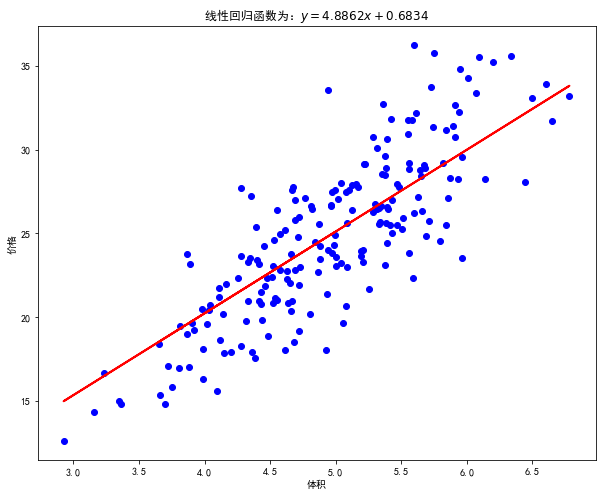

In [67]:
#画出真实散点图和回归模型曲线
plt.scatter(X_test, Y_test,  color='blue')
plt.plot(X_test, Y_pred, color='red', linewidth=2,)
plt.xlabel('体积')
plt.ylabel('价格')
plt.title("线性回归函数为：$y={0:.4f}x{1:+.4f}$".format(simple_linear_regression.coef_[0][0],simple_linear_regression.intercept_[0]))

### 3.线性回归中的过拟合现象

In [68]:
#数据数据集
overfitting_data = pandas.read_csv(r'./Datasets/overfitting_data.csv')
overfitting_data.head(10)

,X,Y
0,0.139925,0.581130
1,0.648120,-0.194055
2,0.541590,0.483162
3,0.724928,-0.449584
4,0.350579,0.795314
5,0.459952,0.741680
6,0.400183,0.885036
7,0.329932,0.949077
8,0.912957,-1.254721
9,0.365396,0.995896


Text(0.5, 1.0, 'Y-X 散点图')

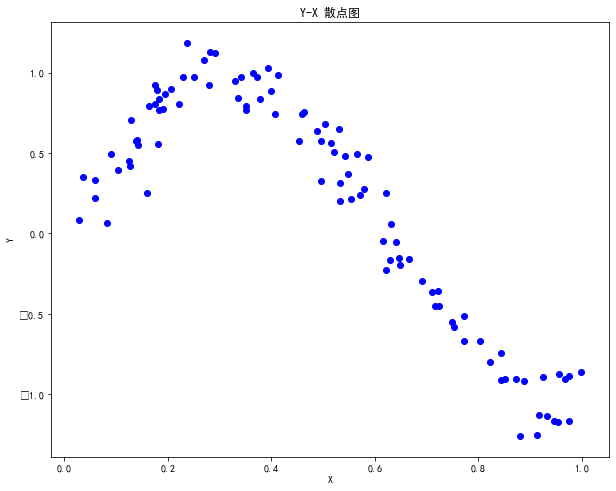

In [69]:
#画散点图查看数据分布情况
plt.scatter(overfitting_data['X'], overfitting_data['Y'],  color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Y-X 散点图')

In [70]:
#将整个数据集分成训练集和测试集。
#训练集有70%的数据，并保留另外30%的数据作为测试集。
X = overfitting_data['X']
Y = overfitting_data['Y']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

采用多项式模型，并调整模型阶次改变模型复杂度，并校验模型性能.

In [71]:
#定义函数linear_regression_with_degree，该函数用于回归拟合，并显示回归后的曲线
#参数X_train，Y_train为训练集的输入和输出
#参数X_test, Y_test为测试集的输入和输出
#参数degree为多项式的阶次
def linear_regression_with_degree(X_train,Y_train,X_test,Y_test,degree):
    
    #创建高阶特征管道
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(pandas.DataFrame(X_train), pandas.DataFrame(Y_train))
    
    #查看多项式系数和截距
    print("多项式模型的系数向量为：", model.named_steps["linearregression"].coef_)
    print("多项式模型的截距为：", model.named_steps["linearregression"].intercept_)
    
    #按照模型需求调整测试集
    X_test = pandas.DataFrame(X_test.values,columns=['X'])
    X_test = X_test.sort_values(by=['X'])
    Y_test = pandas.DataFrame(Y_test.values)
    Y_test = Y_test.iloc[X_test.index]

    #模型预测输出
    Y_pred = model.predict(X_test)
    #采用样条光滑技术。样条函数阶次越高越光滑 
    smooth_feature = numpy.linspace(numpy.min(X_test['X'].tolist()),numpy.max(X_test['X'].tolist()),1000) 
    smooth_points = make_interp_spline(X_test['X'].tolist(),Y_pred)(smooth_feature)
    
    #画散点图和回归曲线
    plt.scatter(X_test, Y_test,  color='blue')
    plt.plot(smooth_feature,smooth_points,'-g')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('测试集平均绝对误差(Mean Absolute Error): %.4f' % mean_absolute_error(Y_test,Y_pred) )

In [72]:
#linear_regression_with_degree_mae，该函数用于回归拟合，并计算平均绝对误差
#参数X_train，Y_train为训练集的输入和输出
#参数X_test, Y_test为测试集的输入和输出
#参数degree为多项式的阶次
def linear_regression_with_degree_mae(X_train,Y_train,X_test,Y_test,degree):
    
    #创建高阶特征管道
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(pandas.DataFrame(X_train), pandas.DataFrame(Y_train))
    
    #按照模型需求调整测试集
    X_test = pandas.DataFrame(X_test.values,columns=['X'])
    X_test = X_test.sort_values(by=['X'])
    Y_test = pandas.DataFrame(Y_test.values)
    Y_test = Y_test.iloc[X_test.index]

    #模型预测输出
    Y_pred = model.predict(X_test)
    
    #按照模型需求调整测试集
    X_train = pandas.DataFrame(X_train.values,columns=['X'])
    X_train = X_train.sort_values(by=['X'])
    Y_train = pandas.DataFrame(Y_train.values)
    Y_train = Y_train.iloc[X_train.index]
        
    Y_Train_Pred = model.predict(X_train)
    return mean_squared_error(Y_test,Y_pred),mean_squared_error(Y_train,Y_Train_Pred)

多项式模型的系数向量为： [[ 0.          2.65073515 -4.72909836]]
多项式模型的截距为： [0.36926245]


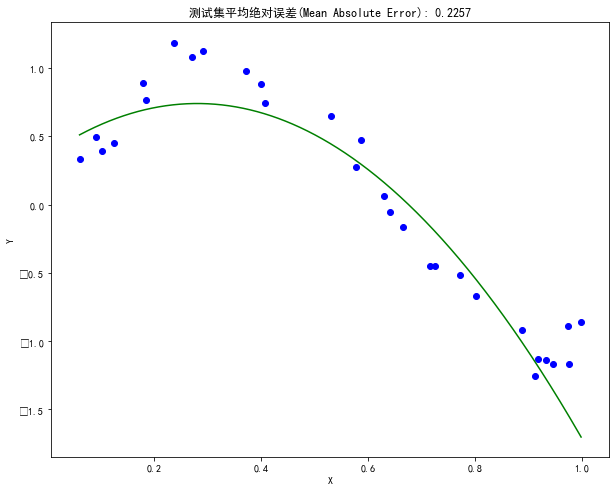

In [73]:
#选用2阶多项式拟合
linear_regression_with_degree(X_train,Y_train,X_test,Y_test,2)

多项式模型的系数向量为： [[  0.           6.43691759  -7.16694637 -12.04702294  12.06795031]]
多项式模型的截距为： [-0.12078655]


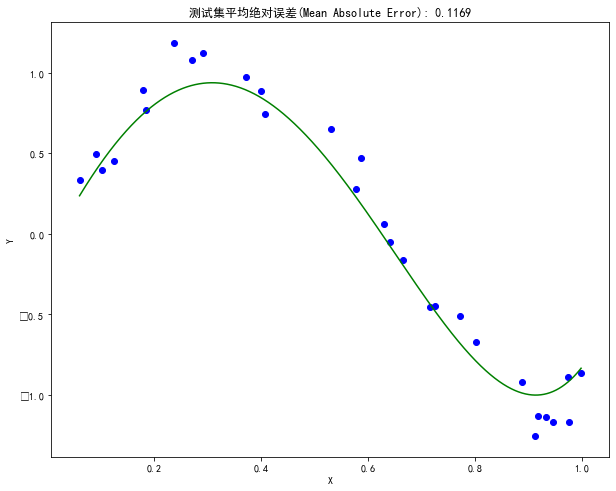

In [74]:
#选用4阶多项式拟合
linear_regression_with_degree(X_train,Y_train,X_test,Y_test,4)

多项式模型的系数向量为： [[ 0.00000000e+00  9.47598570e+02 -3.26048000e+04  6.09062499e+05
  -7.07397912e+06  5.52002992e+07 -3.03373342e+08  1.20999119e+09
  -3.56849595e+09  7.86124541e+09 -1.29680485e+10  1.59296282e+10
  -1.43455705e+10  9.19017318e+09 -3.96257203e+09  1.03032765e+09
  -1.22009073e+08]]
多项式模型的截距为： [-10.79131736]


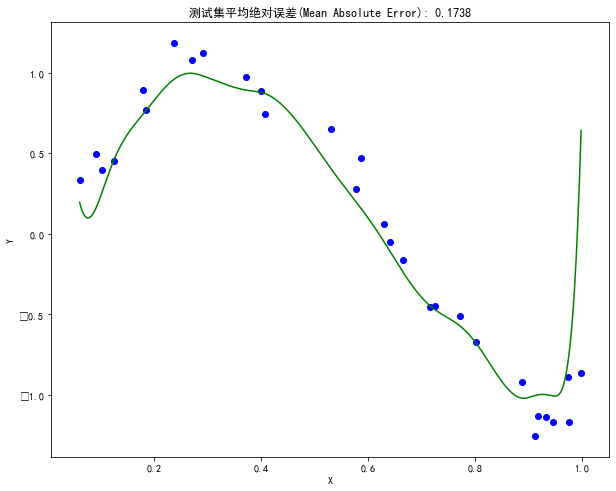

In [75]:
#选用16阶多项式拟合
linear_regression_with_degree(X_train,Y_train,X_test,Y_test,16)

显而易见，阶次高（模型复杂）不一定有效。
就测试集而言，4阶多项式拟合比2阶要好。但是16阶多项式则显著减低模型拟合性能。
16阶多项式模型中，对训练集拟合极为精确，然而针对测试集（新数据）呈现出很差的性能，泛化能力差

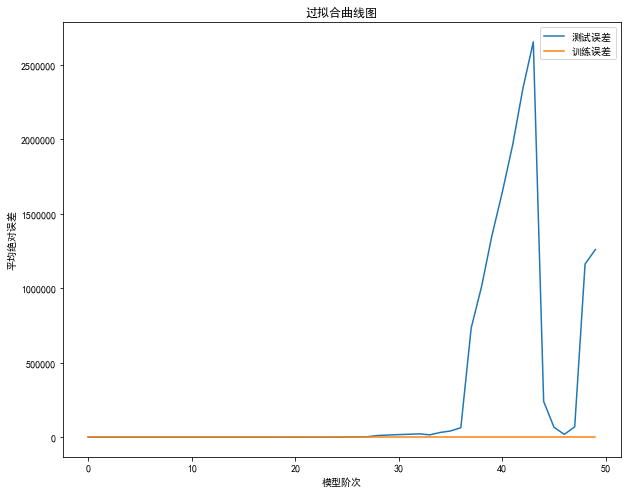

In [76]:
error_values = list()
for i in range(0,50):
    error_values.append(linear_regression_with_degree_mae(X_train,Y_train,X_test,Y_test,i))
pd_error_values = pandas.DataFrame(error_values, columns=["测试误差","训练误差"])
plt.plot(pd_error_values)
plt.ylabel('平均绝对误差')
plt.xlabel('模型阶次')
plt.title('过拟合曲线图')
plt.legend(pd_error_values)

### 4.实验作业：针对过拟合数据集
1. 绘制训练集和测试集平均绝对误差与阶次变化关系曲线图，找出最佳拟合模型.
2. 给出最佳拟合模型的函数关系式.
3. 尝试以均方误差代替实验中的平均绝对误差来分析模型性能，找出均方误差下的最佳拟合模型
